## Greg Surber <br />
CS 506 Fall 2020 <br />
Week 8 PE

In [8]:
# import sklearn features
from sklearn import  datasets
from sklearn.model_selection import train_test_split

# import numpy and pandas for dataframe and math functions
import numpy as np
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# Import DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Load the data set
iris = datasets.load_iris()

In [9]:
X=iris.data   # data that contains 4 features of 150 samples. 
y=iris.target # labels with ground truth information

# split the data into split% training and (100-split)% testing
split = 0.9

# Create input and output features
# feature_names are the column headings
X_data = pd.DataFrame(iris.data, columns=feature_names)
y_data = iris.target

# Create the test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
# Import ExhaustiveFeatureSelector from Mlxtend
import mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Import KNeighborsClassifier from Scikit-learn
from sklearn.neighbors import KNeighborsClassifier



In [20]:
# Create an EFS object
# Use ExhaustiveFeatureSelector as the classifier, the minimum number of features to consider is 1,
# the maximum number of features to consider is 4 (the total number of features available),
# the metric we want to evaluate by is accuracy, and the number of cross-validations to perform
# is set to 5.
# The number of 'neighbors' to judge for proximity is set to the range of 1-10, to account for 
# multiple KNeighborClassifier values.

for i in range(1, 11):
    # assign knn variable and set neighbors to 5
    knn = KNeighborsClassifier(n_neighbors=i)

    efs = EFS(estimator=knn, min_features=1, max_features=4, scoring='accuracy', cv=5)                

    # Set the lables for the 4 features
    feature_names = iris.feature_names #('sepal length', 'sepal width', 'petal length', 'petal width')

    # Train EFS with our dataset
    efs = efs.fit(X_train, y_train, custom_feature_names=feature_names)

    # Print the results
    # best_score_ shows the best score
    print(f'\nBest accuracy score for "k" value {i}: %.2f ' % efs.best_score_)  

    # best_idx_ shows the index(ices) of the feature(s) that yield the best score
    print(f'Best subset (indices) for "k" value {i}:', efs.best_idx_)        

    # best_feature_names_ shows the feature name(s) that yield the best score
    print(f'Best subset (corresponding names) for "k" value {i}:', efs.best_feature_names_, '\n') 

Features: 15/15
Best accuracy score for "k" value 1: 0.98 
Best subset (indices) for "k" value 1: (2, 3)
Best subset (corresponding names) for "k" value 1: ('petal length (cm)', 'petal width (cm)') 

Features: 15/15
Best accuracy score for "k" value 2: 0.98 
Best subset (indices) for "k" value 2: (2, 3)
Best subset (corresponding names) for "k" value 2: ('petal length (cm)', 'petal width (cm)') 

Features: 15/15
Best accuracy score for "k" value 3: 0.97 
Best subset (indices) for "k" value 3: (0, 3)
Best subset (corresponding names) for "k" value 3: ('sepal length (cm)', 'petal width (cm)') 

Features: 15/15
Best accuracy score for "k" value 4: 0.97 
Best subset (indices) for "k" value 4: (0, 2, 3)
Best subset (corresponding names) for "k" value 4: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)') 

Features: 15/15
Best accuracy score for "k" value 5: 0.96 
Best subset (indices) for "k" value 5: (3,)
Best subset (corresponding names) for "k" value 5: ('petal width (cm)',) 

In [21]:
# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 3


In [22]:
# Show the performance of each subset of features in a pandas dataframe
# scores are sorted in descending order, so the feature index matchings at the top have a higher 
# chance of providing accurate predictions
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9629629629629629, 0.8888888888888888, 1.0, ...",0.97037,"(sepal length (cm), petal length (cm), petal w...",0.0555146,0.0431922,0.0215961
14,"(0, 1, 2, 3)","[1.0, 0.8888888888888888, 1.0, 0.9629629629629...",0.97037,"(sepal length (cm), sepal width (cm), petal le...",0.0555146,0.0431922,0.0215961
3,"(3,)","[0.9629629629629629, 0.9629629629629629, 1.0, ...",0.962963,"(petal width (cm),)",0.030107,0.0234243,0.0117121
8,"(1, 3)","[0.9629629629629629, 0.9629629629629629, 1.0, ...",0.962963,"(sepal width (cm), petal width (cm))",0.030107,0.0234243,0.0117121
9,"(2, 3)","[0.9629629629629629, 0.9259259259259259, 1.0, ...",0.962963,"(petal length (cm), petal width (cm))",0.0425777,0.0331269,0.0165635
13,"(1, 2, 3)","[0.9629629629629629, 0.8888888888888888, 1.0, ...",0.955556,"(sepal width (cm), petal length (cm), petal wi...",0.0555146,0.0431922,0.0215961
2,"(2,)","[0.9629629629629629, 0.8888888888888888, 1.0, ...",0.948148,"(petal length (cm),)",0.0485461,0.0377705,0.0188853
6,"(0, 3)","[0.9629629629629629, 0.8888888888888888, 0.962...",0.948148,"(sepal length (cm), petal width (cm))",0.0380827,0.0296296,0.0148148
10,"(0, 1, 2)","[0.9629629629629629, 0.8888888888888888, 1.0, ...",0.948148,"(sepal length (cm), sepal width (cm), petal le...",0.0485461,0.0377705,0.0188853
5,"(0, 2)","[0.9629629629629629, 0.8518518518518519, 1.0, ...",0.940741,"(sepal length (cm), petal length (cm))",0.0645723,0.0502395,0.0251197


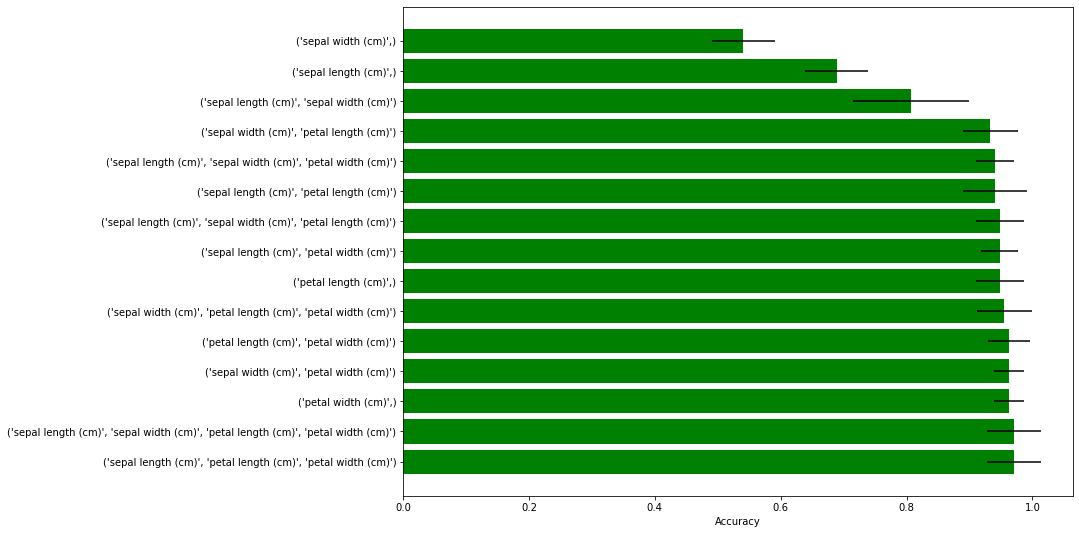

In [23]:
# Create a horizontal bar chart for visualizing the performance of each subset of features
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, efs_results['avg_score'], xerr=efs_results['std_dev'], color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [24]:
for mxdepth in range(1, 11):
    classifier1 = DecisionTreeClassifier(max_depth=mxdepth)
    classifier1.fit(X_train,y_train)
    predictions=classifier1.predict(X_test)
    # The mkdepth for the given values 1-10 results in the indicated accuracy level. 
    print(f"DTC ({mxdepth}) = %0.2f accuracy" % accuracy_score(y_test,predictions))
    # The accuracy goes up from 47% t0 93% at mxdepth = 2.
    # This suggests that a mxdepth of 2 would be as successful as any of 3-10.

DTC (1) = 0.53 accuracy
DTC (2) = 0.93 accuracy
DTC (3) = 0.93 accuracy
DTC (4) = 0.93 accuracy
DTC (5) = 0.93 accuracy
DTC (6) = 0.93 accuracy
DTC (7) = 0.93 accuracy
DTC (8) = 0.93 accuracy
DTC (9) = 0.93 accuracy
DTC (10) = 0.93 accuracy


In [25]:
for k in range(1, 11):
    classifier2 = KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(X_train,y_train)
    predictions=classifier2.predict(X_test)
    # The k value for the given values 1-10 results in the indicated accuracy level.
    # The results suggests that, as long as the k value used is not 5 or 7-10, it is sufficient to provide 100% accuracy.
    print(f"KNN ({k}) = %0.2f accuracy" % accuracy_score(y_test,predictions))


KNN (1) = 0.93 accuracy
KNN (2) = 0.93 accuracy
KNN (3) = 0.93 accuracy
KNN (4) = 0.93 accuracy
KNN (5) = 0.93 accuracy
KNN (6) = 0.93 accuracy
KNN (7) = 0.93 accuracy
KNN (8) = 1.00 accuracy
KNN (9) = 0.93 accuracy
KNN (10) = 1.00 accuracy
